In [206]:
!pip install fastparquet
!pip install matplotlib

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

df = pd.read_parquet('yellow_tripdata_2020-07.parquet', engine='fastparquet')

df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2020-07-01 00:25:32,2020-07-01 00:33:39,1.0,1.50,1.0,N,238,75,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,0.0,NaN
1,1,2020-07-01 00:03:19,2020-07-01 00:25:43,1.0,9.50,1.0,N,138,216,1,26.5,0.5,0.5,0.00,0.0,0.3,27.80,0.0,NaN
2,2,2020-07-01 00:15:11,2020-07-01 00:29:24,1.0,5.85,1.0,N,230,88,2,18.5,0.5,0.5,0.00,0.0,0.3,22.30,2.5,NaN
3,2,2020-07-01 00:30:49,2020-07-01 00:38:26,1.0,1.90,1.0,N,88,232,1,8.0,0.5,0.5,2.36,0.0,0.3,14.16,2.5,NaN
4,2,2020-07-01 00:31:26,2020-07-01 00:38:02,1.0,1.25,1.0,N,37,17,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,0.0,NaN
5,1,2020-07-01 00:09:00,2020-07-01 00:34:39,1.0,9.70,1.0,N,140,61,1,30.0,3.0,0.5,0.00,0.0,0.3,33.80,2.5,NaN
6,2,2020-07-01 00:44:08,2020-07-01 00:58:12,1.0,5.27,1.0,N,137,260,1,16.5,0.5,0.5,6.09,0.0,0.3,26.39,2.5,NaN
7,2,2020-07-01 00:49:20,2020-07-01 00:56:44,1.0,1.32,1.0,N,166,41,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0,NaN
8,2,2020-07-01 00:21:59,2020-07-01 00:25:12,1.0,0.73,1.0,N,239,142,1,5.0,0.5,0.5,1.32,0.0,0.3,10.12,2.5,NaN
9,2,2020-07-01 00:08:28,2020-07-01 00:36:18,1.0,18.65,2.0,N,132,249,1,52.0,0.0,0.5,11.06,0.0,0.3,66.36,2.5,NaN


In [208]:
col = 'fare_amount'
df[col].unique()

df[col].sort_values()

,fare_amount
78485,-391.50
377409,-350.00
257238,-281.00
368459,-259.50
561326,-175.00
...,...
310088,703.50
377408,850.00
664007,999.08
99235,1091.00


In [209]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [210]:
# Calcular duração da viagem
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

# Converter duração para minutos
df['trip_duration_minutes'] = df['trip_duration'].dt.total_seconds() / 60

In [262]:
df = df[df['total_amount'] >= 0] # Remover Valores Negativos (3697) - (800412 pra 796715 linhas)
df = df[df['passenger_count'].isna() == False] # Passageiros Nulos (62838)

# Verificaçãooo df[(df['trip_duration_minutes'] > 60) & (df['trip_distance'] == 0)].sort_values(by='trip_duration_minutes', ascending=False)
mais_uma_hora_parado = df[(df['trip_duration_minutes'] > 60) & (df['trip_distance'] == 0)]
df = df.drop(mais_uma_hora_parado.index) # Removendo os paradões por mais de uma hora (695)

# Removendo viagens com mais de 150 distancia (227)
mais_40_distancia = df[df['trip_distance'] > 40]
df = df.drop(mais_40_distancia.index)

# Removendo viagens com mais de 150 dols (12)
mais_150_total = df[df['total_amount'] > 150]
df = df.drop(mais_150_total.index)

# Removendo viagens com valor 0 (255)
viagem_gratis = df[df['total_amount'] <= 0]
df = df.drop(viagem_gratis.index)

# Removendo viagens com mais de 3 horas (1424)
maior_3_horas = df[df['trip_duration_minutes'] > 180]
df = df.drop(maior_3_horas.index)

# Removendo Tempo Negativo ou Zerado(2)
tempo_negativo = df[df['trip_duration_minutes'] <= 0 | (df['trip_duration_minutes'] < 1)]
df = df.drop(tempo_negativo.index)

<Axes: >

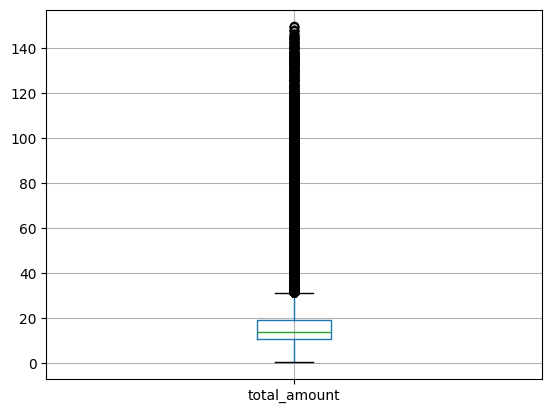

In [263]:
df.boxplot(column = ['total_amount'])

In [259]:
df['total_amount'].sort_values(ascending=False)

,total_amount
285792,149.54
731019,149.42
732108,149.17
576381,147.80
693988,147.77
...,...
289220,0.30
232181,0.30
9579,0.30
370885,0.30


Text(0, 0.5, 'Viagens')

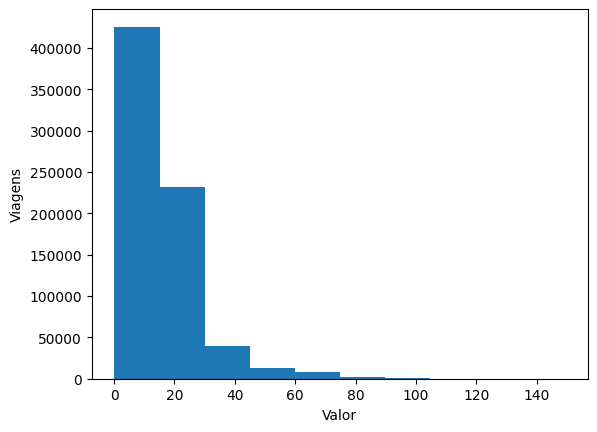

In [264]:
plt.hist(df['total_amount'], bins = 10)
plt.xlabel ('Valor')
plt.ylabel ('Viagens')

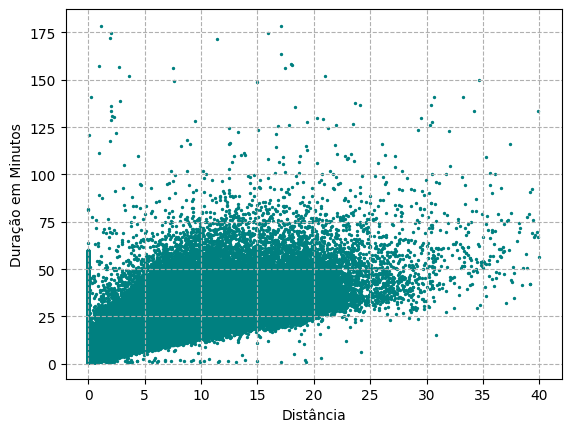

In [260]:
scatter = df.plot.scatter(x='trip_distance', y='trip_duration_minutes', s=2, c='teal')
scatter.set_xlabel('Distância')
scatter.set_ylabel('Duração em Minutos')
plt.grid(linestyle = 'dashed')
plt.show()

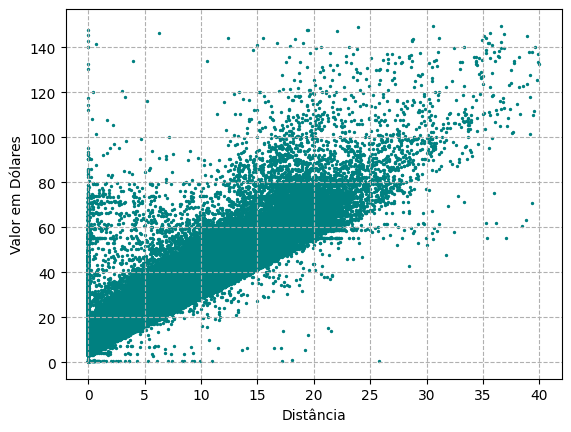

In [257]:
scatter = df.plot.scatter(x='trip_distance', y='total_amount', s=2, c='teal')
scatter.set_xlabel('Distância')
scatter.set_ylabel('Valor em Dólares')
plt.grid(linestyle = 'dashed')
plt.show()

In [256]:
df['trip_duration'].describe()

,trip_duration
count,721548
mean,0 days 00:11:35.221575002
std,0 days 00:09:10.199075761
min,0 days 00:01:00
25%,0 days 00:05:34
50%,0 days 00:09:04
75%,0 days 00:14:33
max,0 days 02:58:27


In [235]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'trip_duration',
       'trip_duration_minutes'],
      dtype='object')

In [255]:
df[df['trip_duration_minutes'] < 1]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration,trip_duration_minutes
